In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob

In [68]:
mpl.__version__

'3.3.4'

In [69]:
SUBSETS = ['max_fraction_same_cluster_MCMsubset.tsv', 'max_fraction_same_cluster_RibosomalSubset.tsv', 'max_fraction_same_cluster_MucocystSubsets.tsv', 'max_fraction_same_cluster_Histone_subset.tsv', 'max_fraction_same_cluster_ProteosomeSubset.tsv']

In [70]:
FRACTION_THRESHOLD = 0.1

In [71]:
# # scan_data = pd.read_csv('./microarray_EXP_manhattan_2024-04-29_15-13-40.982278_scan_stats.csv')
# scan_data = pd.read_csv('./microarray_EXP_manhattan_2024-04-29_18-10-14.503839_scan_stats.csv')
# scan_data.head()

# pattern1 = './2024-05-04/*'

pattern1 = './2024-06-04/*'

stats_files = glob.glob(pattern1)

# stats_files = stats_files + glob.glob(pattern2)

scan_data = None

for s_file in stats_files:
    if scan_data is None:
        scan_data = pd.read_csv(s_file)
        continue

    curr_df = pd.read_csv(s_file)

    scan_data = pd.concat([scan_data, curr_df], ignore_index=True)

In [72]:
scan_data = scan_data.loc[
    scan_data['parameter'] <= 0.1
]

In [73]:
scan_data

,partition_type,dimensionality,metric,graph,nns,clustering,parameter,silhouette_score,modularity,nclusters,...,sd_enriched_cluster_size,max_enriched_cluster_size,min_enriched_cluster_size,nenriched_cluster_genes,datetime,max_fraction_same_cluster_MCMsubset.tsv,max_fraction_same_cluster_RibosomalSubset.tsv,max_fraction_same_cluster_MucocystSubsets.tsv,max_fraction_same_cluster_Histone_subset.tsv,max_fraction_same_cluster_ProteosomeSubset.tsv
0,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.000,-0.397803,0.001877,7,...,10131.661671,21498,21498,21509,2024-05-05 16:34:35.197850,1.00,1.000000,1.000000,1.000000,1.000000
1,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.005,-0.053681,0.779495,663,...,14.635035,86,86,5256,2024-05-05 16:34:35.197850,0.50,0.166667,0.566667,0.571429,0.224490
2,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.010,-0.048463,0.756063,1004,...,7.900204,53,53,4112,2024-05-05 16:34:35.197850,0.50,0.155556,0.500000,0.571429,0.204082
3,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.015,-0.043802,0.740821,1273,...,6.471391,42,42,3614,2024-05-05 16:34:35.197850,0.50,0.155556,0.500000,0.571429,0.142857
4,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.020,-0.033367,0.728495,1502,...,5.222683,38,38,3275,2024-05-05 16:34:35.197850,0.50,0.155556,0.300000,0.571429,0.142857
5,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.025,-0.031786,0.718405,1695,...,4.557412,26,26,3057,2024-05-05 16:34:35.197850,0.50,0.155556,0.300000,0.571429,0.142857
6,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.030,-0.027393,0.708738,1887,...,4.162898,26,26,3019,2024-05-05 16:34:35.197850,0.50,0.155556,0.300000,0.571429,0.142857
7,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.035,-0.023529,0.701452,2048,...,3.627091,22,22,2901,2024-05-05 16:34:35.197850,0.50,0.155556,0.300000,0.571429,0.142857
8,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.040,-0.019486,0.694039,2207,...,3.369777,24,24,2683,2024-05-05 16:34:35.197850,0.50,0.155556,0.300000,0.571429,0.142857
9,EXP,baseline,manhattan,umap_fuzzy_simplicial_set,3,leiden_cpm,0.045,-0.017085,0.688113,2337,...,3.173378,22,22,2590,2024-05-05 16:34:35.197850,0.50,0.155556,0.300000,0.571429,0.142857


In [74]:
scan_data['max_fraction_same_cluster_Histone_subset.tsv'].unique()

array([1.        , 0.57142857])

In [75]:
# scan_data[scan_data['nns'] == 3]

In [76]:
scan_nns = np.sort(scan_data['nns'].unique())
scan_rps = np.sort(scan_data['parameter'].unique())

In [77]:
scan_nns, scan_nns.shape

(array([3]), (1,))

In [78]:
scan_rps, scan_rps.shape

(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
        0.09 , 0.095, 0.1  ]),
 (21,))

In [79]:
np.where(scan_rps == 0.1)[0][0]

20

In [80]:
scan_nns_idxs = {_scan_nn: idx for idx, _scan_nn in enumerate(scan_nns)}
scan_nns_idxs

{3: 0}

In [81]:
scan_rps_idxs = {_scan_nn: idx for idx, _scan_nn in enumerate(scan_rps)}
scan_rps_idxs

{0.0: 0,
 0.005: 1,
 0.01: 2,
 0.015: 3,
 0.02: 4,
 0.025: 5,
 0.03: 6,
 0.035: 7,
 0.04: 8,
 0.045: 9,
 0.05: 10,
 0.055: 11,
 0.06: 12,
 0.065: 13,
 0.07: 14,
 0.075: 15,
 0.08: 16,
 0.085: 17,
 0.09: 18,
 0.095: 19,
 0.1: 20}

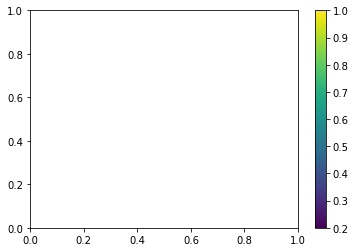

max_fraction_same_cluster_MCMsubset.tsv


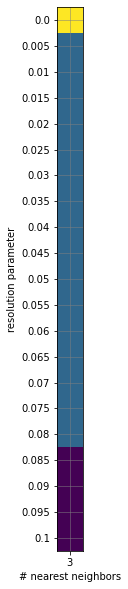

max_fraction_same_cluster_RibosomalSubset.tsv


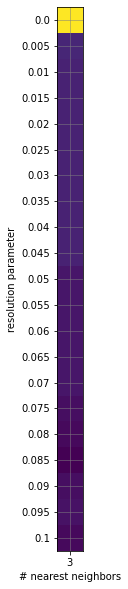

max_fraction_same_cluster_MucocystSubsets.tsv


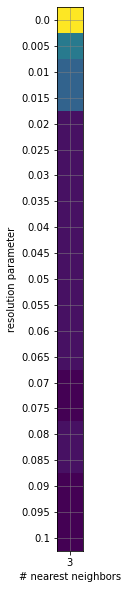

max_fraction_same_cluster_Histone_subset.tsv


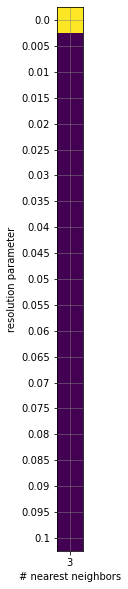

max_fraction_same_cluster_ProteosomeSubset.tsv


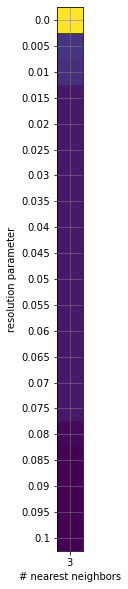

In [83]:
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap = cmap))

plt.show()

for SUBSET in SUBSETS:
    all_muco_together_arr = np.zeros((scan_rps.shape[0], scan_nns.shape[0]), dtype=float)
    print(SUBSET)
    for idx, row in scan_data.iterrows():
        all_muco_together_arr[scan_rps_idxs[row['parameter']], scan_nns_idxs[row['nns']]] = row[SUBSET]
    
    plt.figure(figsize=(10, 10))

    plt.imshow(all_muco_together_arr, cmap='viridis', interpolation='nearest')

    plt.xticks(np.arange(len(scan_nns)), scan_nns)
    plt.yticks(np.arange(len(scan_rps)), [rp for rp in scan_rps])

    plt.xlabel('# nearest neighbors')
    plt.ylabel('resolution parameter')

    plt.grid(color='gray', linestyle='-', linewidth=0.5)

    plt.show()